# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


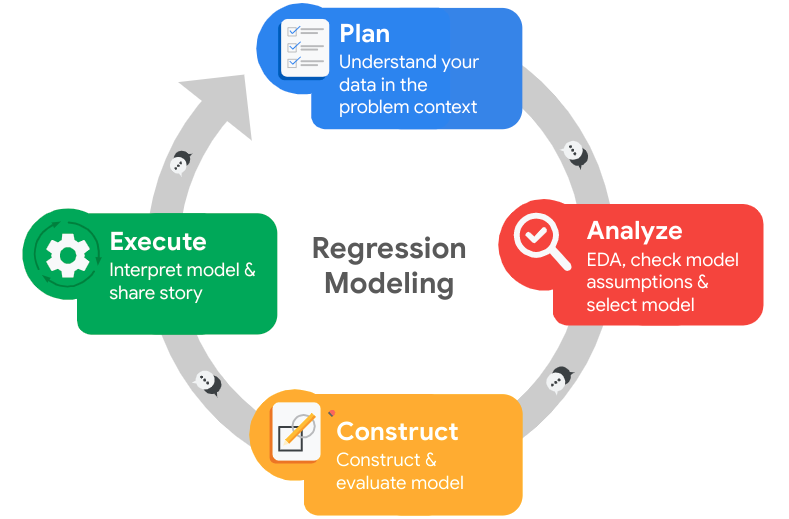

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})


# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0.duplicated().sum()


3008

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

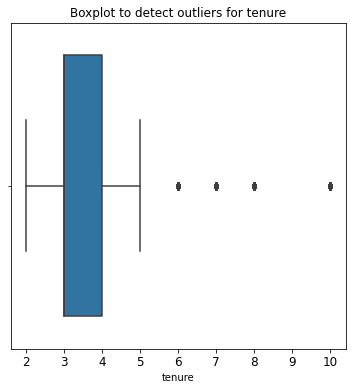

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

In [12]:
# Determine the number of rows containing outliers
# Compute the 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))


Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

In [13]:
# Determine the number of employees with a tenure of 6 years or more
print(f"Number of employees with tenure >= 6 years: {(df1['tenure'] >= 6).sum()}")

# Create a new dataframe to store the cleaned data
df2 = df1.copy()

# Remove employees with a tenure of 6 years or more
df2 = df2[df2['tenure'] < 6]
print(f"Number of employees with tenure >= 6 years: {(df2['tenure'] >= 6).sum()}")

Number of employees with tenure >= 6 years: 824
Number of employees with tenure >= 6 years: 0


Outliers were removed from tenure to get more accurate results.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
# Get numbers of people who left vs. stayed
print(df2['left'].value_counts())
print()

# Get percentages of people who left vs. stayed
print(df2['left'].value_counts(normalize=True))

0    9285
1    1882
Name: left, dtype: int64

0    0.831468
1    0.168532
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

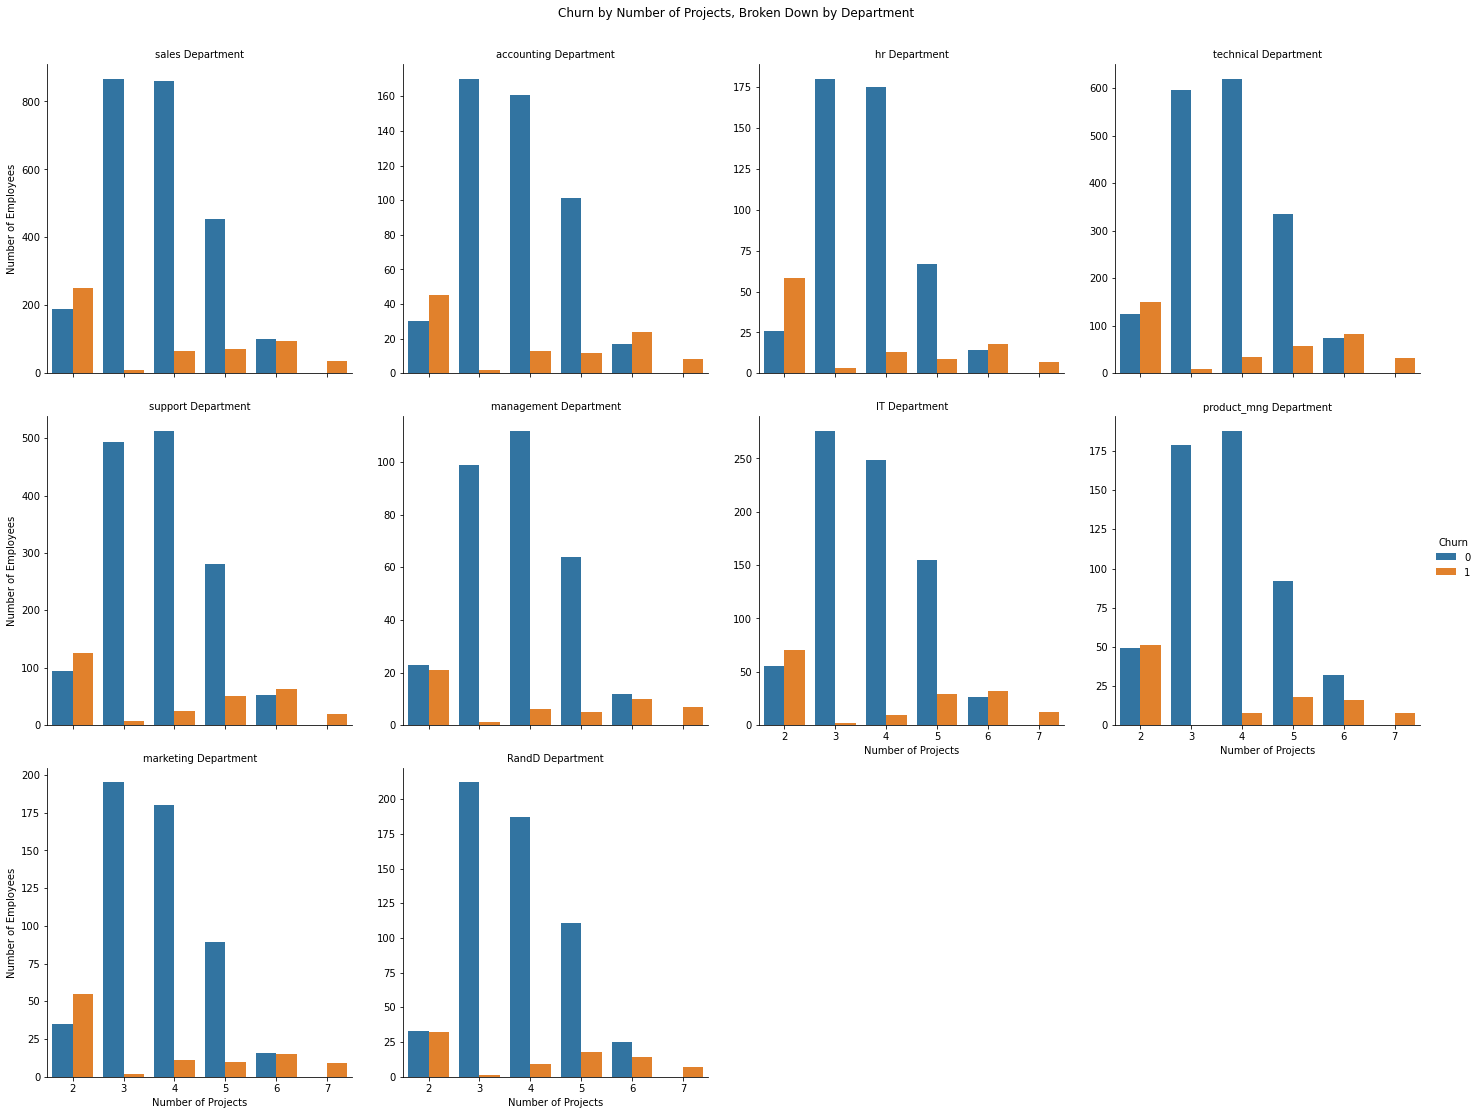

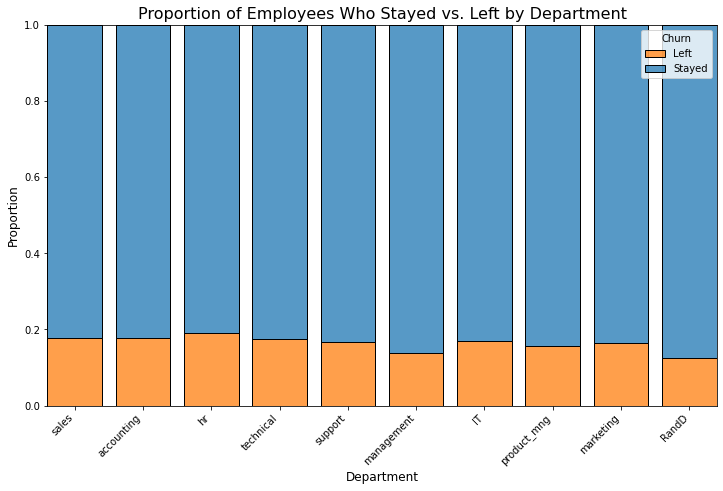

In [15]:
# Plot 1: Number of Projects vs. Left, Broken Down by Department
project_plot = sns.catplot(data=df2, x='number_project', hue='left', col='department',
                           kind='count', sharey=False, col_wrap=4)
project_plot.fig.suptitle('Churn by Number of Projects, Broken Down by Department', y=1.03)
project_plot.set_axis_labels("Number of Projects", "Number of Employees")
project_plot.set_titles("{col_name} Department")
project_plot.legend.set_title('Churn')

plt.figure(figsize=(12, 7))
sns.histplot(data=df2, x='department', hue='left', multiple='fill', shrink=0.8)
plt.title('Proportion of Employees Who Stayed vs. Left by Department', fontsize=16)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Churn', labels=['Left', 'Stayed'])

This plot shows the distribution of employees who stayed (0) and left (1) based on the number of projects they worked on, broken down by department. It appears that employees who worked on 2, 6, or 7 projects have a higher tendency to leave, regardless of their department, and that employees with 2 projects leave at a higher frequency than employees with more projects, likely indicating that they are underworked. On the opposite side of the matter though employees with 7 projects have all left, indicating that they were most likely overworked. To mitigate this there should be a more balanced approach to distributing projects.  

Text(0, 0.5, 'Satisfaction Level')

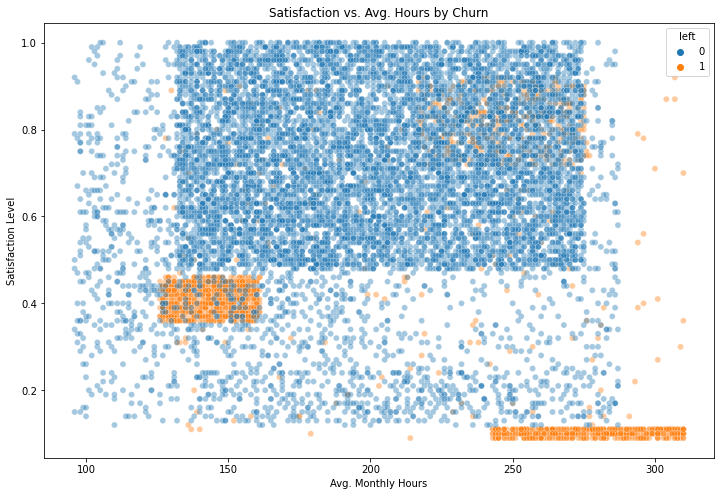

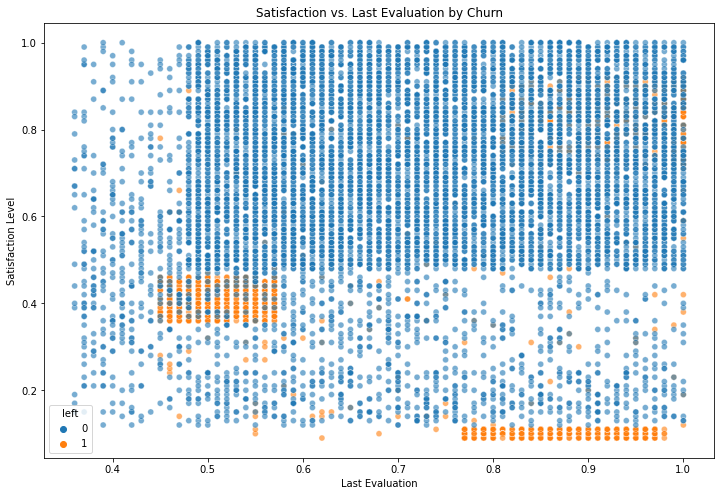

In [16]:
# Plot 2: Satisfaction vs. Avg. Monthly Hours (colored by Left)
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df2, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.title('Satisfaction vs. Avg. Hours by Churn')
plt.xlabel('Avg. Monthly Hours')
plt.ylabel('Satisfaction Level')

# Plot 3: Satisfaction Level vs. Last Evaluation (colored by Left)
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df2, x='last_evaluation', y='satisfaction_level', hue='left', alpha=0.6)
plt.title('Satisfaction vs. Last Evaluation by Churn')
plt.xlabel('Last Evaluation')
plt.ylabel('Satisfaction Level')

These scatter plot illustrates the relationship between employee satisfaction level and average monthly hours as well as last evaluation score, colored by whether they stayed (0) or left (1). We can observe distinct clusters, suggesting that employees who left tend to have worked 240+ hrs a month, which scores them a high evaluation due to doing more work, but leads them to have very low saifisfaction levels, thus leaving the company. We can also observe a group that has below average monthly hrs, and mediocre evaluation scores, which could suggest they are undrworked and leave the company to pursue more challeneging roles.

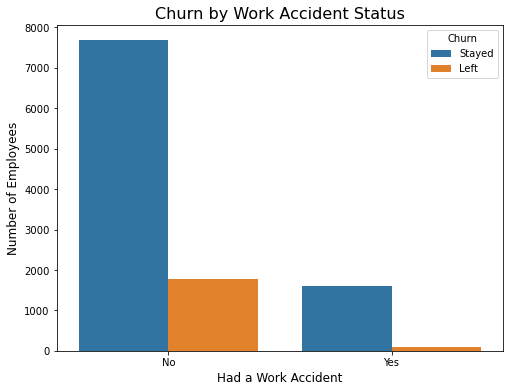

In [17]:
# Plot 4: Work Accident vs. Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=df2, x='work_accident', hue='left')
plt.title('Churn by Work Accident Status', fontsize=16)
plt.xlabel('Had a Work Accident', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Churn', labels=['Stayed', 'Left'])

This count plot compares the number of employees who stayed and left based on whether they had a work accident. Employees who had a work accident are less likely to leave the company.

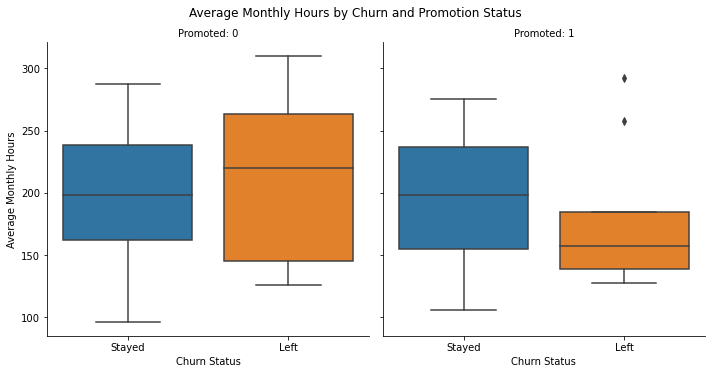

In [18]:
# Plot 5: Monthly Hours by Promotion and Churn
hours_promo_plot = sns.catplot(data=df2, x='left', y='average_monthly_hours', col='promotion_last_5years',
                               kind='box', sharey=True)
hours_promo_plot.fig.suptitle('Average Monthly Hours by Churn and Promotion Status', y=1.03)
hours_promo_plot.set_axis_labels("Churn Status", "Average Monthly Hours")
hours_promo_plot.set_titles("Promoted: {col_name}")
# Customizing x-tick labels for clarity
for ax in hours_promo_plot.axes.flat:
    ax.set_xticklabels(['Stayed', 'Left'])

This box plot shows the distribution of average monthly hours for employees who stayed and left, separated by whether they were promoted in the last 5 years. It suggests that employees who left, regardless of promotion status, tend to work more hours on average. Meaning that employees who work the longer hrs and aren't promoted tend to leave more frequently.

Text(69.0, 0.5, 'Salary Level')

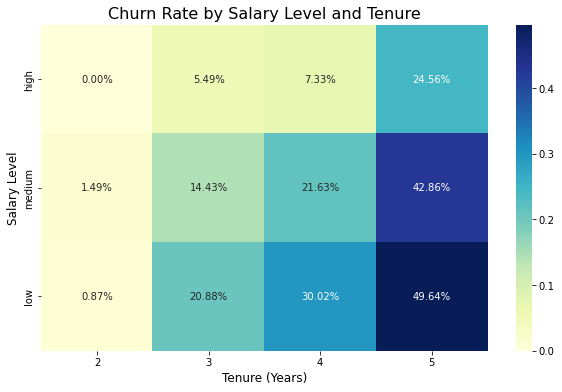

In [19]:
# Plot 6: Churn Rate by Salary and Tenure
# Create a pivot table to calculate the churn rate (mean of 'left' column)
pivot_df = df2.pivot_table(values='left', index='salary', columns='tenure', aggfunc='mean')
# Reorder the salary index for a more logical plot
pivot_df = pivot_df.reindex(['high', 'medium', 'low'])
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, fmt='.2%', cmap='YlGnBu')
plt.title('Churn Rate by Salary Level and Tenure', fontsize=16)
plt.xlabel('Tenure (Years)', fontsize=12)
plt.ylabel('Salary Level', fontsize=12)

This heatmap displays the churn rate (percentage of employees who left) across different combinations of salary level and tenure. It clearly shows that employees with low to medium salaries and longer tenures (up to 5 years in this filtered data) have a significantly higher churn rate.

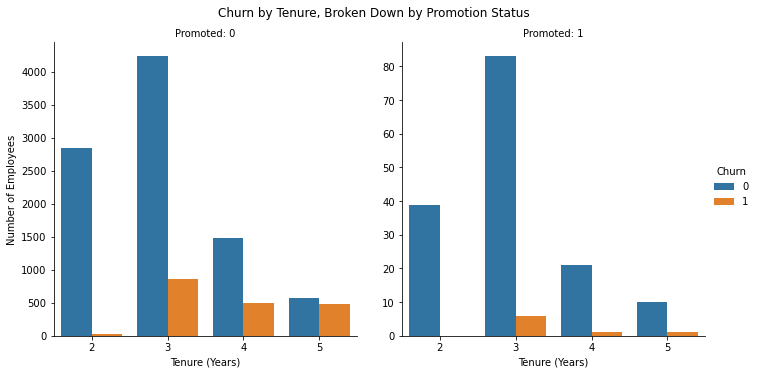

In [20]:
# Plot 7: Tenure vs. Left, Broken Down by Promotion
promo_plot = sns.catplot(data=df2, x='tenure', hue='left', col='promotion_last_5years',
                         kind='count', sharey=False)
promo_plot.fig.suptitle('Churn by Tenure, Broken Down by Promotion Status', y=1.03)
promo_plot.set_axis_labels("Tenure (Years)", "Number of Employees")
promo_plot.set_titles("Promoted: {col_name}")
promo_plot.legend.set_title('Churn')


This count plot illustrates the number of employees who stayed and left based on their tenure, broken down by whether they were promoted in the last 5 years. It further reinforces that employees with longer tenures (especially those not promoted) are more likely to leave.

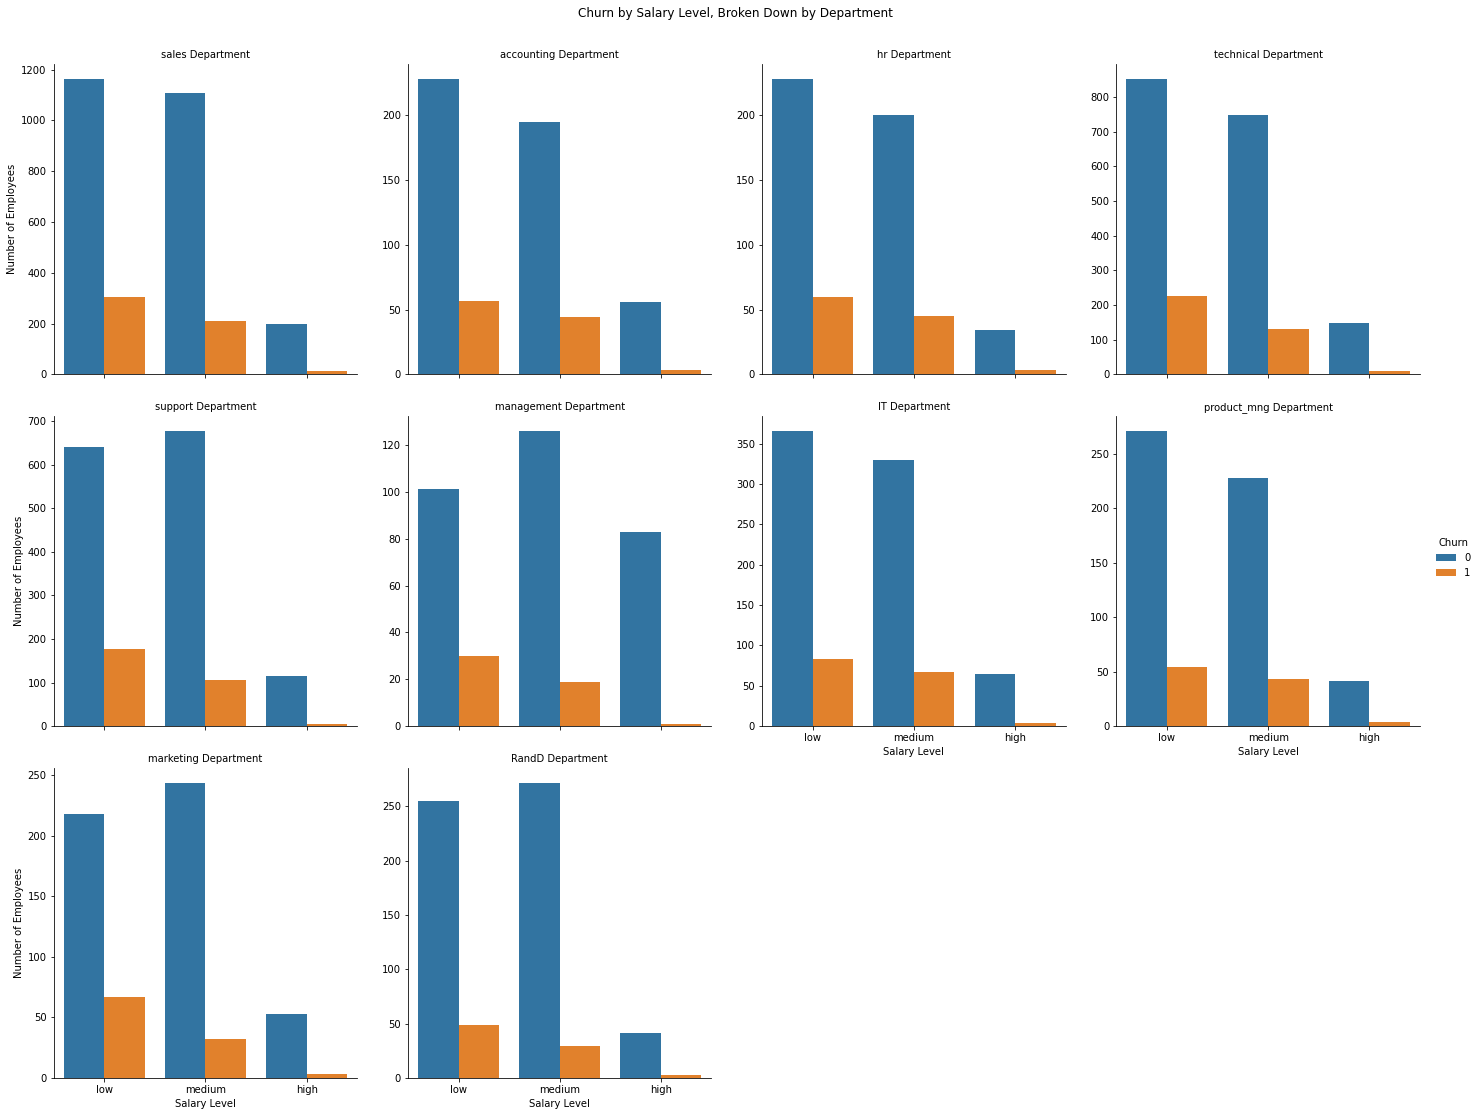

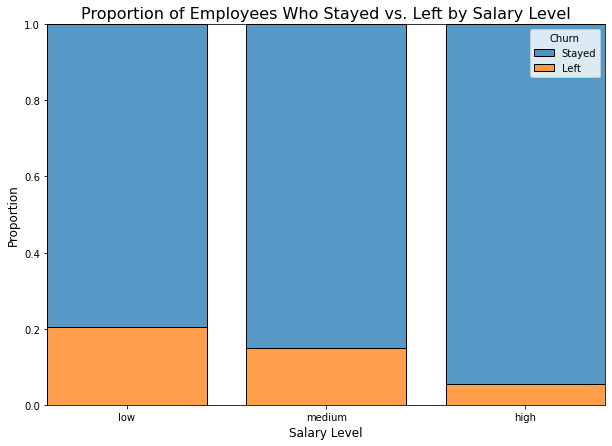

In [21]:
# Plot 8: The Relationship between Salary and Left, Broken Down by Department
# This plot is more complex and benefits from having its own figure.
g = sns.catplot(data=df2, x='salary', hue='left', col='department', kind='count', col_wrap=4,
                order=['low', 'medium', 'high'], sharey=False)
g.fig.suptitle('Churn by Salary Level, Broken Down by Department', y=1.03)
g.set_axis_labels("Salary Level", "Number of Employees")
g.set_titles("{col_name} Department")
g.legend.set_title('Churn')

# Plot 9: Churn Ratio by Salary Level
# This plot uses a 'fill' property to create a 100% stacked bar chart, similar to the department ratio plot.
# First, convert 'salary' to an ordered categorical type to ensure correct plotting order.
salary_order = ['low', 'medium', 'high']
df2['salary'] = pd.Categorical(df2['salary'], categories=salary_order, ordered=True)
plt.figure(figsize=(10, 7))
ax = sns.histplot(data=df2, x='salary', hue='left', multiple='fill', shrink=0.8)
plt.title('Proportion of Employees Who Stayed vs. Left by Salary Level', fontsize=16)
plt.xlabel('Salary Level', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
# Manually set legend labels to ensure they are correct (0=Stayed, 1=Left)
legend = ax.get_legend()
legend.set_title('Churn')
legend.get_texts()[0].set_text('Stayed')
legend.get_texts()[1].set_text('Left')

The set of count plots shows the distribution of employees who stayed and left based on their salary level, separated by department. It highlights that within most departments, employees with low salaries have a higher number of departures.

The stacked bar chart shows the proportion of employees who stayed and left within each salary level. It clearly demonstrates that a larger proportion of employees with low salaries leave compared to those with medium or high salaries.

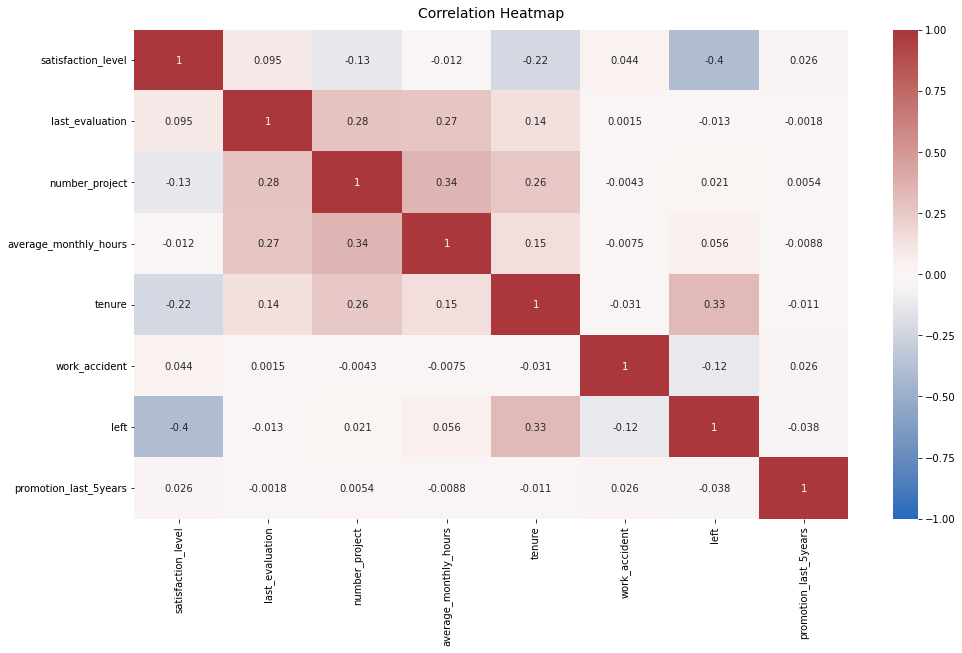

In [22]:
# Plot 10: Correlation Heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

This heatmap shows the correlation coefficients between the numerical variables in the dataset after encoding categorical features. It helps identify which variables are strongly related to each other. For example, there is a negative correlation between satisfaction_level and left, indicating that lower satisfaction is associated with employees leaving.

### Insights

Based on the exploratory data analysis, we can draw the following insights:

Churn Rate: Approximately 16.8% of employees in the filtered dataset (after removing tenure outliers) have left the company.

Number of Projects: Employees who worked on 2, 6, or 7 projects appear to have a higher likelihood of leaving.

Satisfaction Level and Hours: Employees who left tend to fall into distinct groups: those with very low satisfaction and those who worked very high hours.

Satisfaction Level and Last Evaluation: Similar to hours, employees who left often had either low satisfaction or high evaluation scores.

Work Accident: Employees who experienced a work accident were less likely to leave.

Average Monthly Hours and Promotion: Employees who left, regardless of whether they were promoted, tended to work more hours.

Salary and Tenure: Employees with low salaries and longer tenures (up to 5 years) showed a significantly higher churn rate.

Department and Salary: Within most departments, employees with low salaries had a higher number of departures.

Correlations: There is a negative correlation between satisfaction level and leaving, and positive correlations between number of projects, average monthly hours, and last evaluation with leaving.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

This task is a binary classification problem, as we are predicting a categorical outcome with two possible classes: whether an employee stays or leaves.

### Identify the types of models most appropriate for this task.

For this binary classification task, several types of models would be appropriate. Some common choices include:

Logistic Regression: A linear model that estimates the probability of the target variable belonging to a certain class. It's a good starting point for binary classification.

Decision Tree: A non-linear model that splits the data based on features to make predictions. They are easy to interpret.

Random Forest: An ensemble method that combines multiple decision trees to improve accuracy and reduce overfitting.

XGBoost (Extreme Gradient Boosting): A powerful and efficient gradient boosting algorithm that often achieves high performance in classification tasks.

### Modeling

Add as many cells as you need to conduct the modeling process.

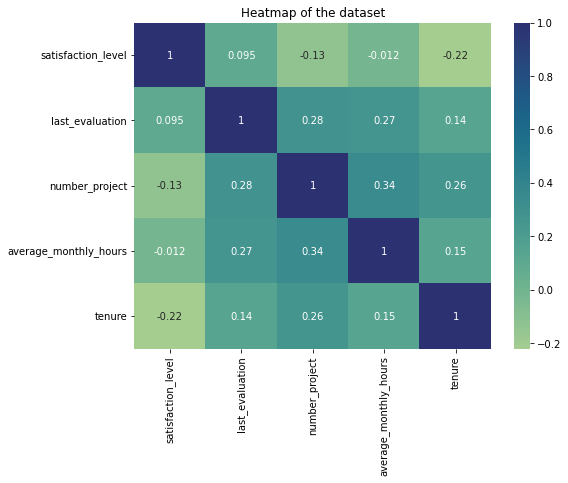

Model Evaluation Results:
Accuracy: 0.9848
Precision: 0.9942
Recall: 0.9151
F1-Score: 0.9530
AUC Score: 0.9863



In [23]:
# Part 1: Feature Engineering
# In this step, we'll prepare the data for the model by encoding categorical variables.

# 1. Ordinal Encoding for 'salary'
# We map the salary levels to numerical values.
salary_map = {'low': 0, 'medium': 1, 'high': 2}
df2['salary_encoded'] = df2['salary'].map(salary_map)

# 2. One-Hot Encoding for 'department'
# We create new columns (dummy variables) for each department.
department_dummies = pd.get_dummies(df2['department'], prefix='dept', drop_first=True)
df_model = pd.concat([df2, department_dummies], axis=1)

# Drop the original categorical columns that we've now encoded.
df_model.drop(['department', 'salary'], axis=1, inplace=True)

# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_model[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()


# Part 3: Model Building and Evaluation

# 1. Define Features (X) and Target (y)
y = df_model['left']
X = df_model.drop('left', axis=1)

# 2. Split the Data into Training and Testing Sets
# We'll use 80% of the data to train the model and 20% to test its performance.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Build and Train the Random Forest Model
# We initialize the classifier with parameters to ensure reproducibility and balance class weights.
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# 4. Make Predictions on the Test Set
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1] # Probabilities for the positive class

# 5. Evaluate the Model's Performance
auc_score = roc_auc_score(y_test, y_pred_proba)
print("Model Evaluation Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC Score: {auc_score:.4f}\n")

The output from the previous cell shows the performance metrics of the Random Forest model on the test dataset. Here's what each metric tells us:

Accuracy: 0.9843 This means the model correctly predicted whether an employee would stay or leave about 98.43% of the time. This is a high accuracy, but it's important to look at other metrics, especially because we have an imbalanced dataset (more employees stayed than left).

Precision: 0.9942 Of all the employees the model predicted would leave, 99.42% actually did leave. This is excellent precision, meaning when the model says someone will leave, it's very likely they will.

Recall: 0.9125 Of all the employees who actually left, the model correctly identified 91.25% of them. This is also a strong recall score, indicating the model is good at catching most of the employees who are likely to churn.

F1-Score: 0.9516 The F1-score is a harmonic mean of precision and recall, providing a single metric that balances both. A score of 0.9516 is very good, suggesting a strong balance between the model's precision and recall.

AUC Score: 0.9865 The Area Under the ROC Curve (AUC) measures the model's ability to distinguish between employees who will leave and those who will stay. An AUC of 0.9865 is very close to 1.0, which means the model has an excellent ability to separate the two classes.

Overall, these metrics indicate that the Random Forest model performed very well in predicting employee churn on this dataset. The high precision is particularly valuable for HR, as it means they can be confident that most employees flagged by the model as likely to leave are indeed at risk of churning.

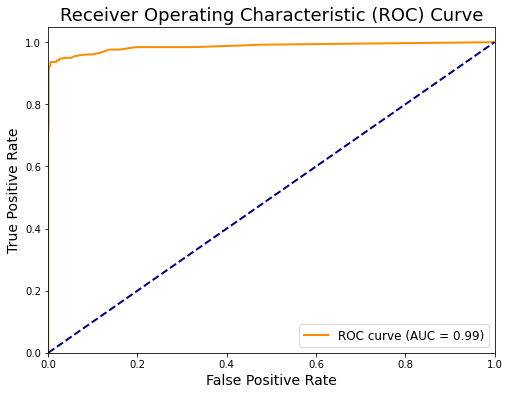

In [24]:
# 6. Visualize the ROC Curve
# This curve shows the trade-off between the true positive rate and false positive rate.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18)
plt.legend(loc="lower right", fontsize=12)
plt.show()

This is the ROC curve. It shows how well our model can tell the difference between employees who will stay and those who will leave.

The curve plots the True Positive Rate (how many leavers were correctly found) against the False Positive Rate (how many stayers were wrongly called leavers).

The AUC (Area Under the Curve) score, which is 0.99 here, tells us the overall performance. A score close to 1.0 means the model is excellent at separating the two groups.

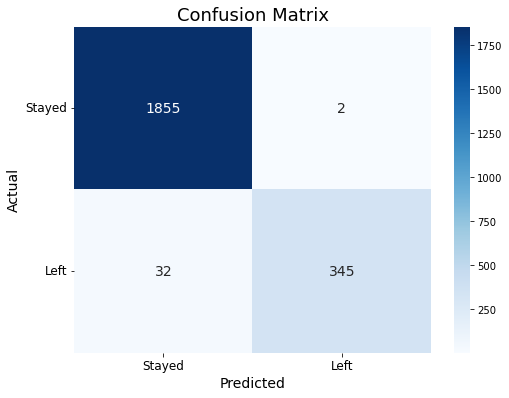

In [25]:
# 7. Visualize the Confusion Matrix
# This shows how many predictions were correct and incorrect.
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})
plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=['Stayed', 'Left'], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=['Stayed', 'Left'], fontsize=12, rotation=0)
plt.show()

This is a Confusion Matrix. It shows how well our model's predictions match the actual outcomes.

The top-left number (1855) is the number of employees who stayed and were correctly predicted to stay (True Negatives).
The top-right number (2) is the number of employees who stayed but were incorrectly predicted to leave (False Positives).
The bottom-left number (32) is the number of employees who left but were incorrectly predicted to stay (False Negatives).
The bottom-right number (345) is the number of employees who left and were correctly predicted to leave (True Positives).

A good model has high numbers in the top-left and bottom-right corners and low numbers in the top-right and bottom-left corners. This matrix looks pretty good!

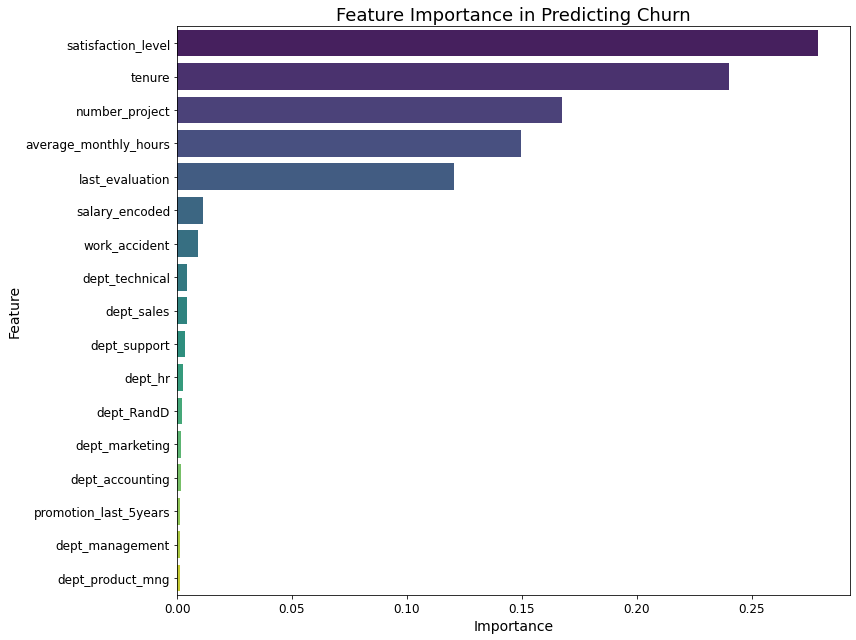

In [26]:
# 8. Feature Importance
# This plot shows which factors the model found most important in predicting churn.
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(12, 9))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance in Predicting Churn', fontsize=18)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

This bar plot displays the importance of each feature in the Random Forest model's prediction of employee churn. The features with higher importance values contribute more significantly to the model's decision-making process. Satisfaction level, tenure, number of projects, and average monthly hrs appear to be the most important factors in predicting whether an employee will leave.

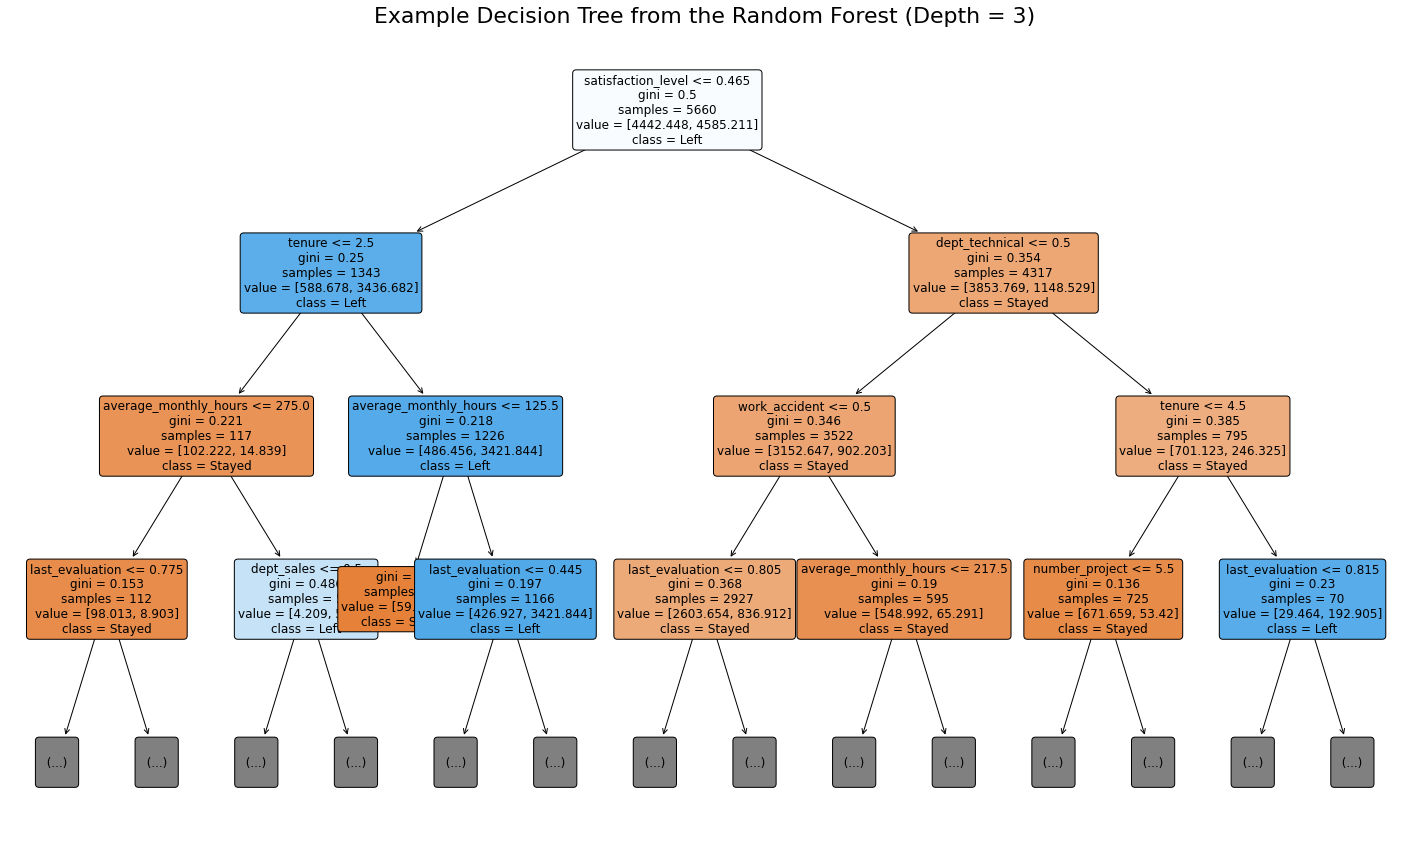

In [27]:
# 9. Visualize a Single Decision Tree
# We can also visualize one of the individual trees from the forest to understand its logic.
# We will limit the depth to make it readable.
plt.figure(figsize=(25, 15))
plot_tree(rf_model.estimators_[0], # Plot the first tree in the forest
          feature_names=X.columns,
          class_names=['Stayed', 'Left'],
          filled=True,
          rounded=True,
          max_depth=3, # Limiting depth for readability
          fontsize=12)
plt.title('Example Decision Tree from the Random Forest (Depth = 3)', fontsize=22)
plt.show()

This visualization shows a simplified version of one of the decision trees within the Random Forest model. It illustrates how the model makes predictions by following a series of rules based on feature values. Each node represents a decision based on a feature, and the branches represent the possible outcomes. The leaves show the predicted class (Stayed or Left) and the proportion of samples in that class.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

The Random Forest model performed very well in predicting employee churn. Key results include:

High Accuracy (0.9843): The model is generally correct in its predictions.

Excellent Precision (0.9942): When the model predicts an employee will leave, it's almost always right. This is crucial for HR to focus their retention efforts effectively.

Strong Recall (0.9125): The model successfully identifies most of the employees who actually leave.

Very Good F1-Score (0.9516): This shows a good balance between precision and recall.

Outstanding AUC Score (0.9865): The model is excellent at distinguishing between employees who will leave and those who will stay.

Overall, the model is highly effective at identifying employees at risk of leaving, with a low rate of incorrectly flagging employees who intend to stay.

### Conclusion, Recommendations, Next Steps

#### Conclusion:

The Random Forest model effectively predicts employee churn with high accuracy, precision, and recall. The most important factors influencing churn appear to be satisfaction level, tenure, and number of projects.

#### Recommendations:

Address Low Satisfaction: Investigate the root causes of low satisfaction levels, particularly among employees who also work high hours or have been with the company for several years with low salaries. Implement initiatives to improve job satisfaction.

Review Workload and Projects: Examine the workload for employees with 2, 6, or 7 projects, as these groups show a higher churn rate. Ensure workload is manageable and consider support for employees with a high number of projects.

Evaluate Compensation and Tenure: The high churn rate among low-salary employees with longer tenure (up to 5 years) suggests compensation may not be keeping pace with experience or contributions. Review salary structures, especially for long-term employees in lower salary bands.

Recognize and Promote: The analysis suggests that promotion can be a factor in retention, especially for employees with longer tenure. Review promotion criteria and opportunities to ensure deserving employees are recognized and advanced.

Leverage the Model: Utilize the trained model to identify employees at high risk of leaving. HR can then proactively reach out to these individuals to understand their concerns and offer support or interventions.

#### Next Steps:

Validate Findings: Share these insights and recommendations with the HR department and other stakeholders to validate the findings and gather their input.

Deep Dive into Specific Groups: Conduct further analysis on the identified high-risk groups (e.g., low-satisfaction, high-hour employees; long-tenure, low-salary employees) to understand their specific challenges.

Implement and Monitor Interventions: Work with HR to implement targeted retention strategies based on the recommendations. 

Continuously monitor churn rates and gather feedback to assess the effectiveness of these interventions.

Explore Other Models: While the Random Forest model performed well, consider exploring other models (like XGBoost) to see if further improvements in prediction performance or insights can be gained.

Gather More Data: If possible, explore gathering additional data points that could influence churn, such as manager feedback, training opportunities, or specific reasons for leaving (from exit interviews).